In [2]:
import numpy as np
import pandas as pd
from statsmodels.datasets import co2
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

# 加载数据
data = co2.load(as_pandas=True).data

In [8]:
data = data['co2'].resample('M').mean().ffill()

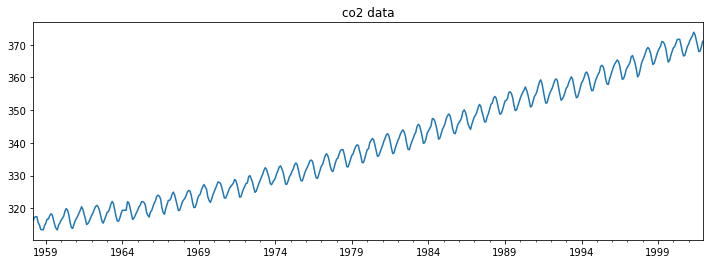

In [10]:
data.plot(figsize=(12,4))
plt.title('co2 data')
plt.show()

In [15]:
# 平稳性检验
res = adfuller(data)
print('p value:', res)
data

p value: (2.2848102439657456, 0.9989453312516823, 14, 511, {'1%': -3.4432119442564324, '5%': -2.8672126791646955, '10%': -2.569791324979607}, 395.7360372798771)


pandas.core.series.Series

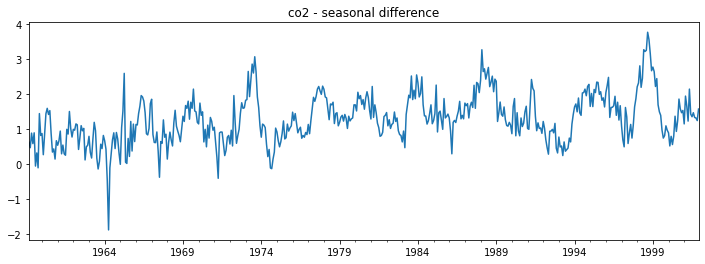

p value: 0.0007785393674428758


In [21]:
# # 一阶差分
data_diff1 = data.diff().dropna()
# # 二阶差分
data_diff2 = data_diff1.diff().dropna()

# 季节差分
data_diff = data.diff(12).dropna()

data_diff.plot(figsize=(12,4))
plt.title('co2 - seasonal difference')
plt.show()

# # ADF检验
res = adfuller(data_diff)
print('p value:', res[1])

In [22]:
from statsmodels.stats.diagnostic import acorr_ljungbox
res = acorr_ljungbox(data, lags=[6,12,24], return_df=True)
print(res)

         lb_stat  lb_pvalue
6    2984.989584        0.0
12   5824.537707        0.0
24  11004.897263        0.0


In [27]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import arma_order_select_ic
bic_min_order = arma_order_select_ic(data_diff, max_ar=6, max_ma=4, ic='bic')['bic_min_order']
print(bic_min_order)

(6, 3)


In [28]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data_diff, order=bic_min_order).fit(disp=-1)
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                    co2   No. Observations:                  514
Model:                     ARMA(6, 3)   Log Likelihood                -236.970
Method:                       css-mle   S.D. of innovations              0.381
Date:                Wed, 19 Jan 2022   AIC                            495.940
Time:                        16:54:12   BIC                            542.605
Sample:                    03-31-1959   HQIC                           514.230
                         - 12-31-2001                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2966      0.108     12.035      0.000       1.085       1.508
ar.L1.co2      1.2555      0.050     24.932      0.000       1.157       1.354
ar.L2.co2      0.4545      0.070      6.510      0.0